In [13]:
import torch
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from src import generation, model, token, datasets

In [2]:
MODEL_DIR = './models'
MODEL_RUN = None
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
def load_assets(model_dir, model_run=None):
    if not model_run:
        dirs = os.listdir(model_dir)
        model_runs = [d for d in dirs if re.fullmatch(r"^\d{8}_\d{6}$", d)]
        model_runs.sort()
        model_run = model_runs[-1]
    with open(f'{model_dir}/{model_run}/results.json', 'r') as f:
        results = json.load(f)
        results_df = pd.DataFrame(results)
    with open(f'{model_dir}/{model_run}/config.json', 'r') as f:
        config = json.load(f)
    
    return results_df, config

In [4]:
results_df, config = load_assets(MODEL_DIR, MODEL_RUN)

In [5]:
results_df

,step_no,num_tokens,tokens_per_sec,learning_rate,training_loss,token_length
0,0,19356,470.165422,0.000002,9.274770,34
1,1,19262,19507.128323,0.000004,9.261623,18
2,2,19364,20301.976256,0.000006,9.233190,22
3,3,19370,20742.691807,0.000008,9.192755,21
4,4,19482,20923.335755,0.000010,9.143031,55
...,...,...,...,...,...,...
2995,2995,19386,18851.425098,0.000013,5.011888,38
2996,2996,19394,19998.340963,0.000013,4.977960,33
2997,2997,19409,18446.709240,0.000013,4.987691,17
2998,2998,19465,18293.982136,0.000013,4.920278,13


<Axes: xlabel='step_no'>

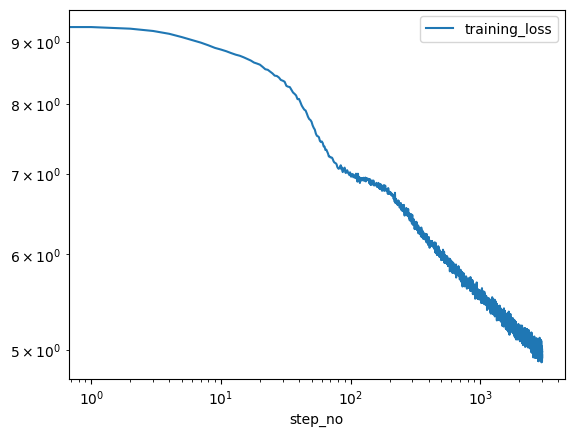

In [6]:
results_df.plot(x="step_no", y="training_loss", loglog=True)

<Axes: xlabel='step_no'>

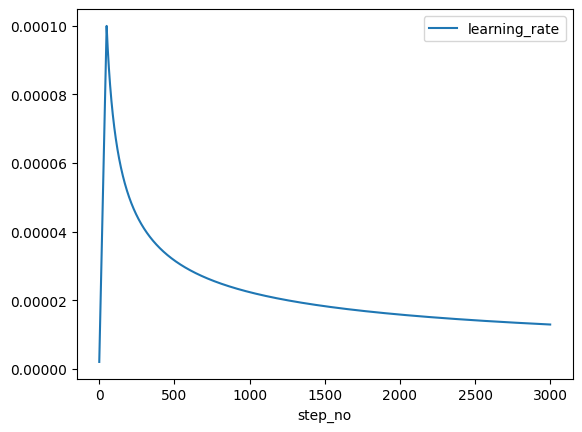

In [7]:
results_df.plot(x="step_no", y="learning_rate")

In [ ]:
tokenizers = token.get_tokenizers(None, config)
transformer = model.build_transformer(config)



In [24]:
translated = generation.generate_texts(
    transformer,
    tokenizers,
    input_texts=["This is a test sentence."],
    max_length=50,
    device=DEVICE
)

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]